# **<font color=white> 04.T-SNE Code 실습**

[목적]
  - Dimensionality Reduction 중 고차원 Data에 적합한 T-SNE Code 실습
  - Reveal Non-linear Structure
     - Text, Image 등 Data에 대해 시각화 하기 적합함
  - Class Label, Learning Algorithm이 아님
  
[Process]
  1. Define Data
  2. Modeling
  3. Plotting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data

from keras.datasets import mnist
from sklearn.manifold import TSNE

In [2]:
# MNIST Data Loading
(X_train, Y_train),(X,y) = mnist.load_data()

del X_train
del Y_train

In [3]:
# Flatten (1, 28, 28) to (1, 784)
X = X.reshape(-1, 28*28)

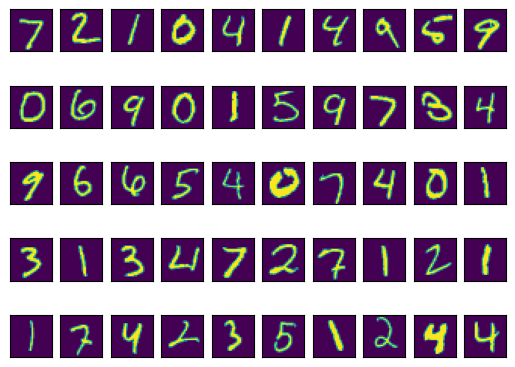

In [4]:
# MNIST Visualization
def show_images(num_images):
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0,num_images): 
            plt.subplot(int(num_images/10),10,digit_num+1) #create subplots
            mat_data = X[digit_num].reshape(28,28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images(50)

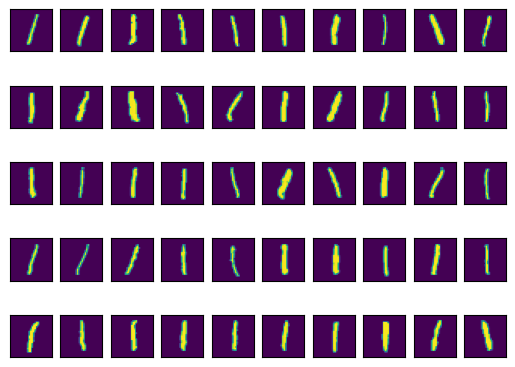

In [5]:
# 특정 숫자 보여주기
def show_images_by_digit(digit_to_see):
    if digit_to_see in list(range(10)):
        indices = np.where(y == digit_to_see) # pull indices for num of interest
        for digit_num in range(0,50): 
            plt.subplot(5,10, digit_num+1) #create subplots
            #reshape images
            mat_data = X[indices[0][digit_num]].reshape(28,28)
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images_by_digit(1)

[T-SNE Parameters]
  - Packge : https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
  - n_components : 몇개의 축으로 차원을 축소할 것 인가
  - perplexity : i 기준 주변 j를 몇개까지 고려할 것 인가
     - The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms
     - Consider selecting a value between 5 and 50
     - default = 30
  - learning_rate : KL-Divergence를 최적화 할때 Gradient Descent를 활용함
     - GD를 할때 Learning rate 의미
     - The learning rate for t-SNE is usually in the range [10.0, 1000.0]
     - default='auto'
  - n_iter : GD iteration
     - Maximum number of iterations for the optimization
     - 적어도 250번 이상 해야함
     - default = 1000
  - init : 처음 저차원에 대한 정보를 시작할때 기준점
     - {'random', 'pca'}
     - KL-Divergence 최적화 전 저차원의 분포와 고차원 분포를 setting 할때 사용
     - Initialization of embedding. PCA initialization cannot be used with precomputed distances and is usually more globally stable than random initialization.
     - default = 'pca'
  - method : Gradient 계산할 때 쓰는 알고리즘
     - {‘barnes_hut’, ‘exact’}
     - Barnes-Hut approximation : O(NlogN) time
     - exact : O(N^2) time
     - exact는 시간 많이 걸림 
        - 실험상 exact가 3% 더 에러가 적음
        - data가 작을 때는 exact로 돌리면 좋음
     - default=’barnes_hut’

In [6]:
X.shape

(10000, 784)

In [7]:
%%time
# 2차원 t-SNE 임베딩 using exact
X_tsne_e = TSNE(n_components = 2, method='exact').fit_transform(X)

CPU times: total: 13min 31s
Wall time: 1h 19min 52s


In [8]:
%%time
# 2차원 t-SNE 임베딩 using barnes_hut
X_tsne_b = TSNE(n_components = 2, method='barnes_hut').fit_transform(X)

CPU times: total: 2min 59s
Wall time: 54.6 s


d:\Dev_folder\anaconda3\envs\recent\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


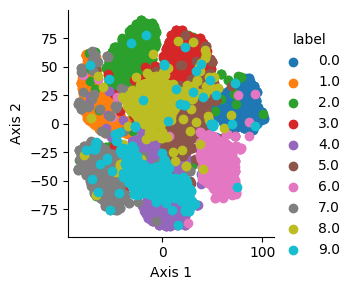

In [10]:
# exact Redesign = 1h 40min
new_coordinates_e = np.vstack((X_tsne_e[:,:2].T, y)).T
dataframe_e = pd.DataFrame(data=new_coordinates_e, columns=("Axis 1", "Axis 2", "label"))
# Plotting
sns.FacetGrid(dataframe_e, hue="label").map(plt.scatter, "Axis 1", "Axis 2").add_legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


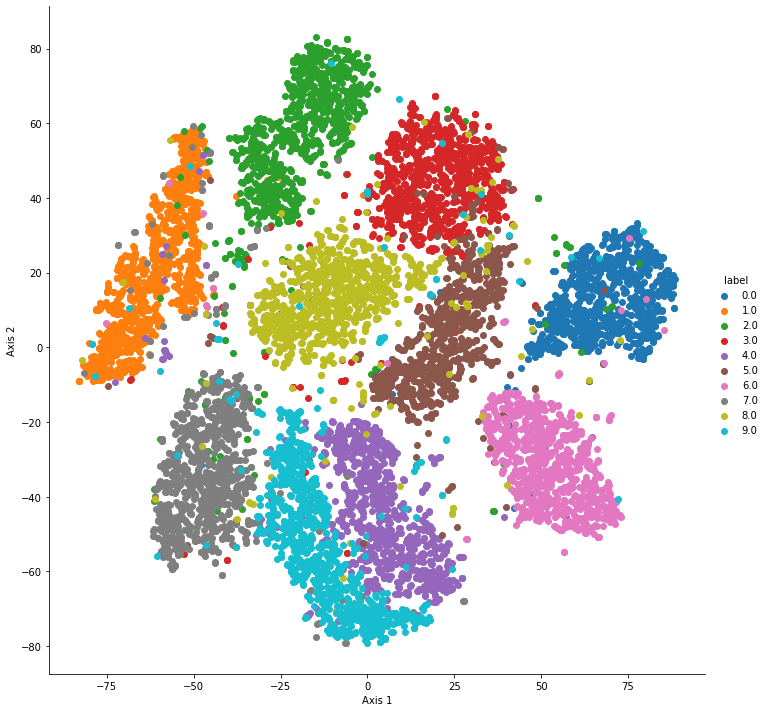

In [ ]:
# Redesign
new_coordinates_b = np.vstack((X_tsne_b[:,:2].T, y)).T
dataframe_b = pd.DataFrame(data=new_coordinates_b, columns=("Axis 1", "Axis 2", "label"))
# Plotting
sns.FacetGrid(dataframe_b, hue="label", size=10).map(plt.scatter, "Axis 1", "Axis 2").add_legend()
plt.show()